# US Honey Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("D:\\US_honey_dataset (1).csv")
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


### Data Cleaning / Preparation

In [6]:
df = df.drop(["Unnamed: 0"],axis = 1) 
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [7]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [8]:
df.tail()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


In [9]:
df.shape

(1115, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [11]:
df.isna().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
df['state'].nunique()

44

In [15]:
df['state'].value_counts()   

state
Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: count, dtype: int64

In [16]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

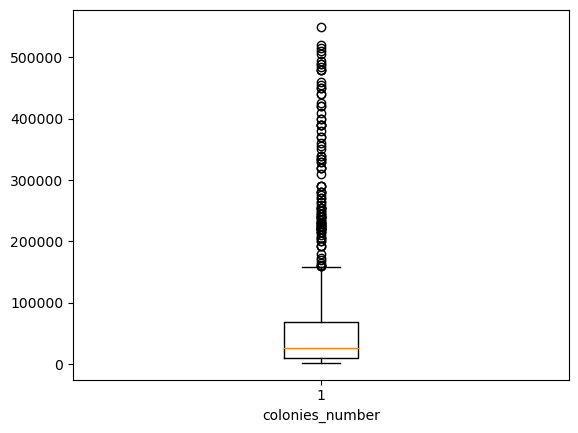

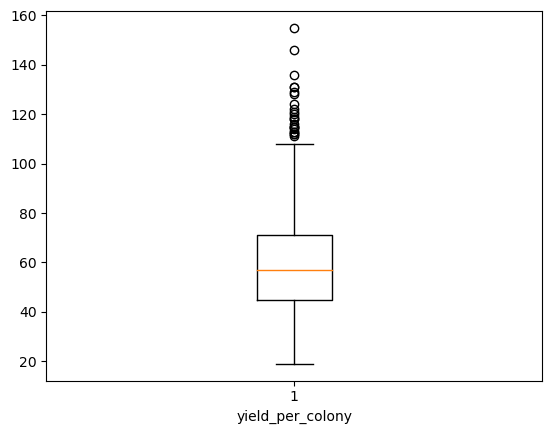

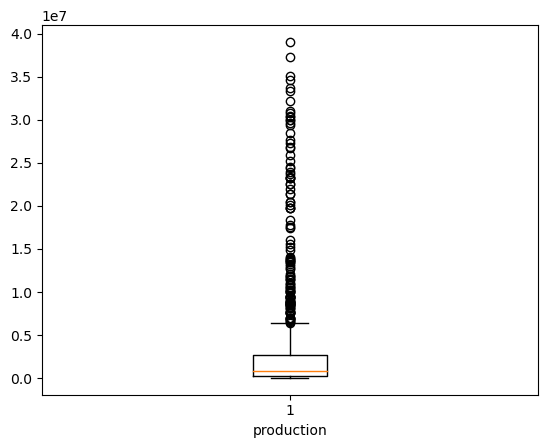

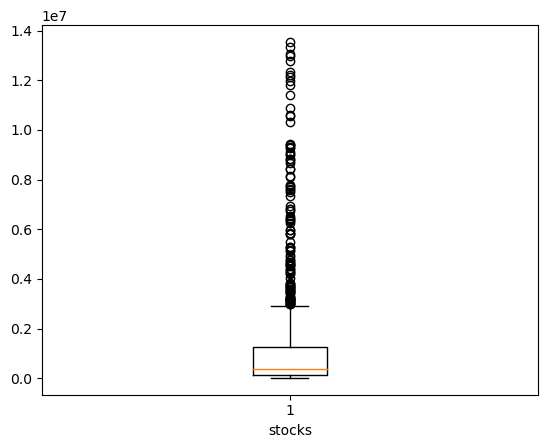

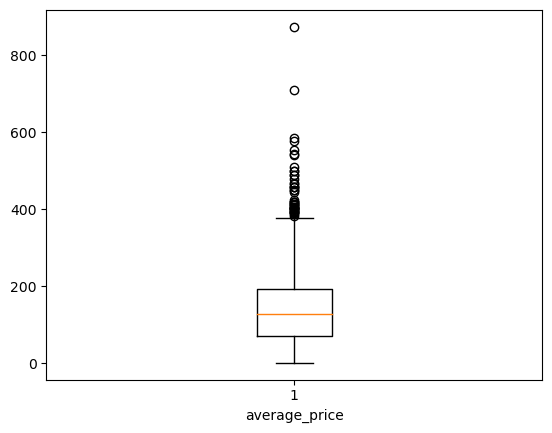

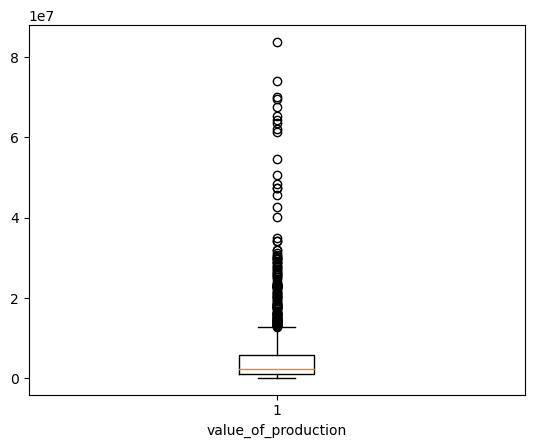

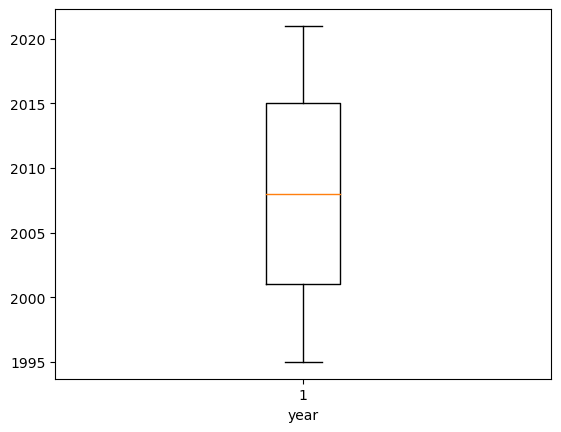

In [17]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

### Exploratory Data Analysis (EDA)

#### Address the following key questions in your analysis:

1. Which states are rarely contributing to honey production for the last 27 years?

2. Which are the top 5 Honey producing states in the US ?

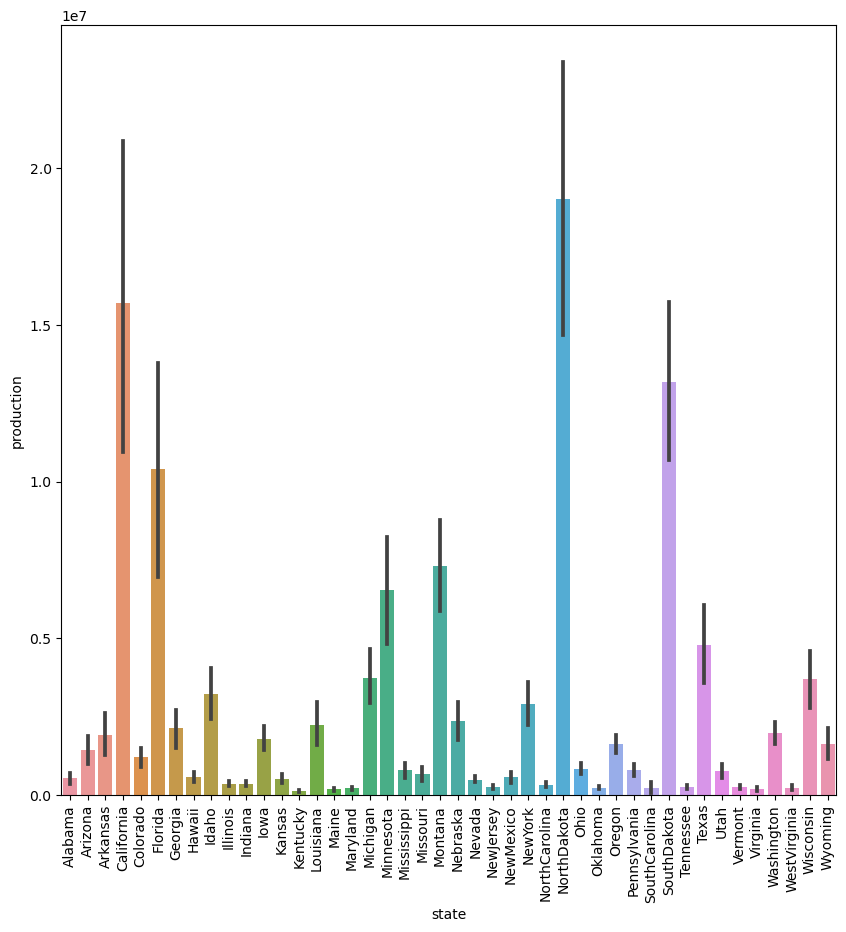

In [18]:
plt.figure(figsize=(10, 10)) 
sns.barplot(x = df['state'], y = df['production'])
plt.xticks(rotation = 90)
plt.show()

In [20]:
data = df.groupby('state').sum().reset_index()
data.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000,54216
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000,54216
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000,54216


In [21]:
data = data.sort_values("production",ascending=False) 
data.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
28,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
34,SouthDakota,6639000,1950,355726000,218634000,2891.51,619095000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
21,Montana,3725000,2148,197173000,91240000,2961.17,406563000,54216


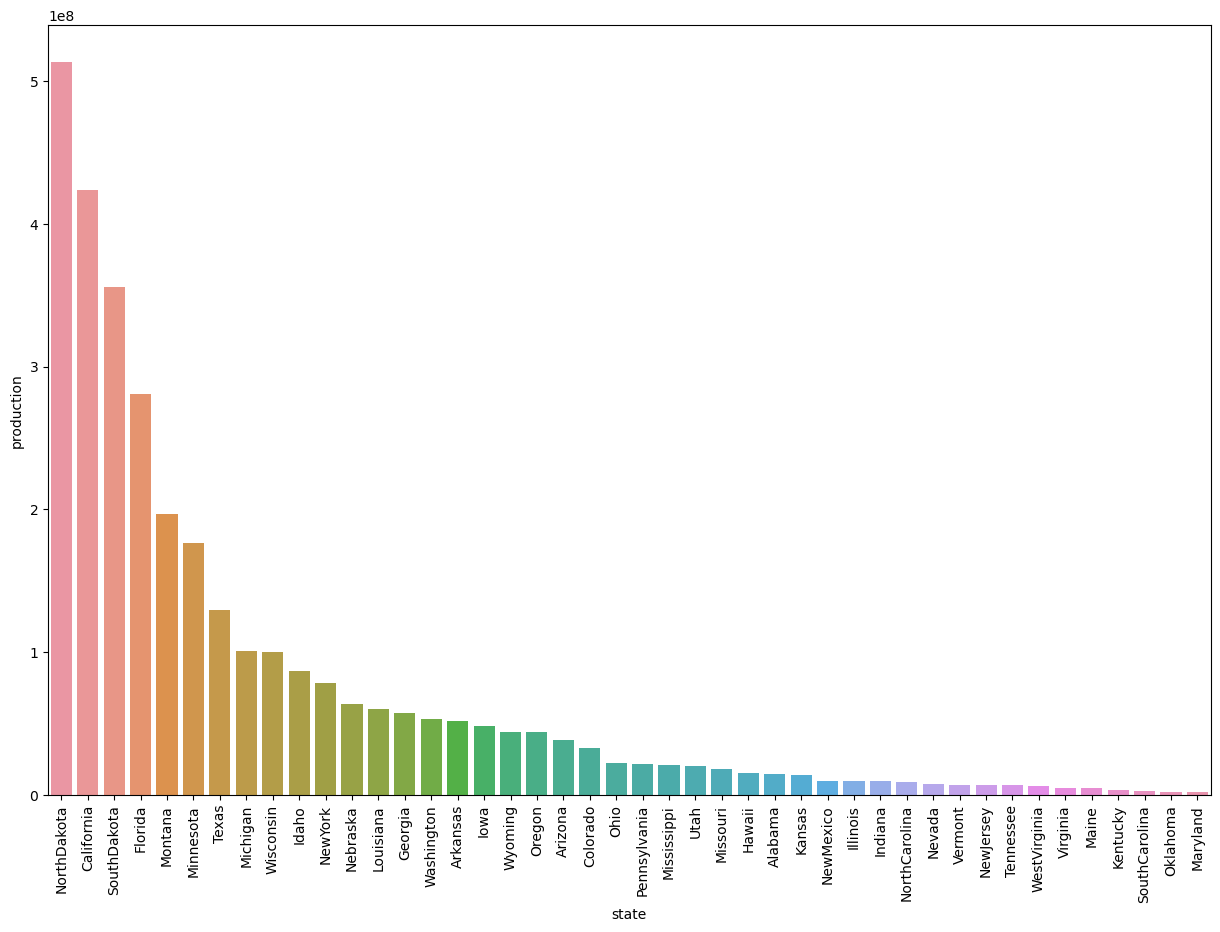

In [22]:
plt.figure(figsize=(15, 10)) 
sns.barplot(x = data['state'], y = data['production'])
plt.xticks(rotation = 90)
plt.show()

### Inference

#### Less Contributing States in honey production:

- Maryland
- Oklahoma
- South Carolina
- Kentucky
- Maine

#### Top Contributing States in honey production:

- North Dakota
- California
- South Dakota
- Florida
- Montana


3. What is the Change in mean Average price of Honey from 1995 to 2021?

In [25]:
df.head(2)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995


In [26]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021], dtype=int64)

In [27]:
df.dtypes

state                   object
colonies_number          int64
yield_per_colony         int64
production               int64
stocks                   int64
average_price          float64
value_of_production      int64
year                     int64
dtype: object

In [28]:
data2 = df.groupby('year').mean(numeric_only=True)['average_price'].reset_index()
data2.head()

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581


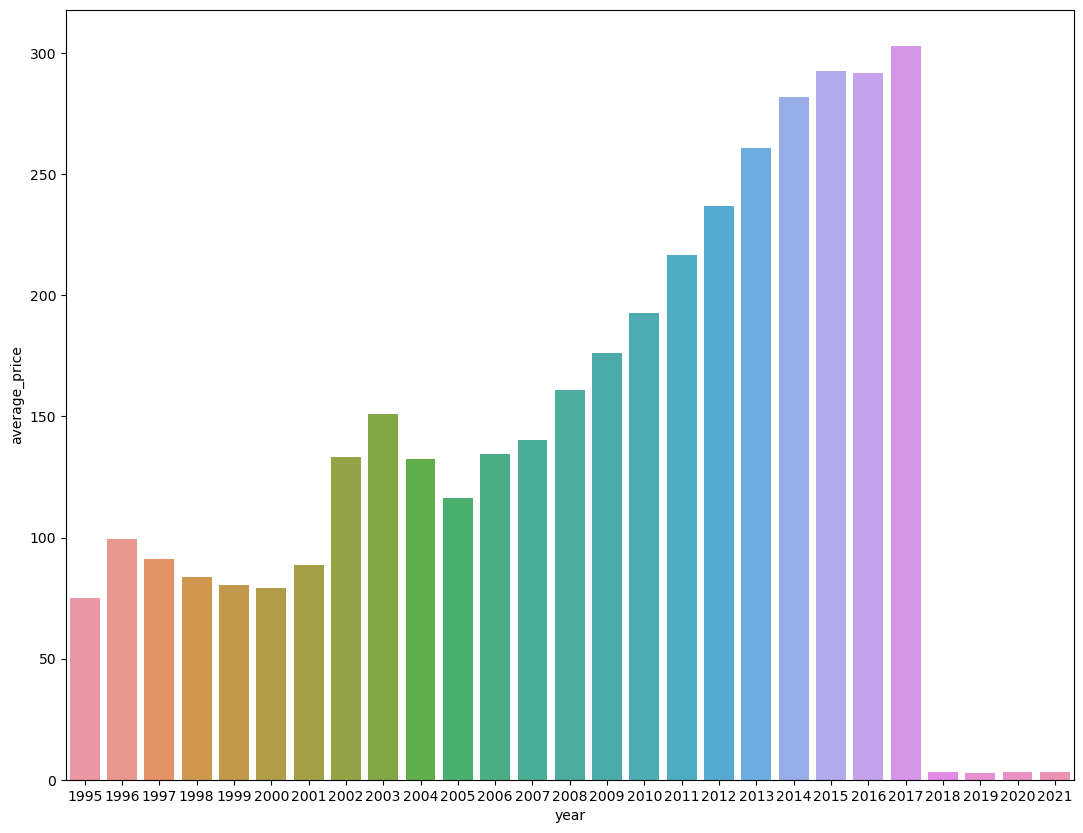

In [29]:
plt.figure(figsize=(13,10))
sns.barplot(x=data2['year'],y=data2['average_price'])
plt.show()

### Inference

- From 2005 to 2017, there was a continuous and substantial increase in the average price of honey.
- Starting from 2018 onwards, there was a dramatic drop in the average price of honey.

4. Which was the year when production of Honey in whole US was the highest?

In [31]:
data3 = df.groupby('year').sum()['production'].reset_index()
data3.head()

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000


In [33]:
data3 = data3.sort_values('production', ascending= False)
data3.head()

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000


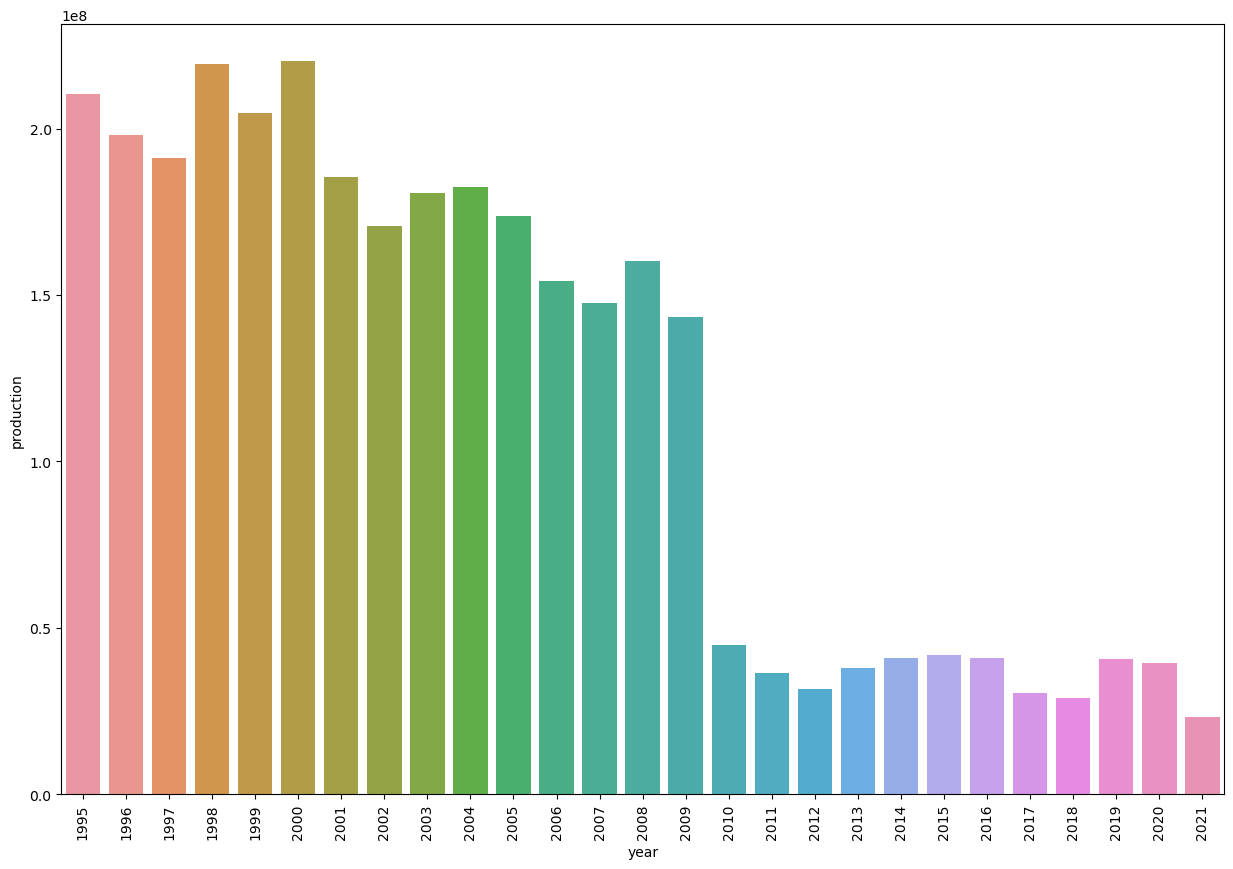

In [73]:
plt.figure(figsize=(15, 10)) 
sns.barplot(x = data3['year'], y = data3['production'])
plt.xticks(rotation = 90)
plt.show()

#### Inference

- The year with the highest honey production in the U.S. over the given period is 2000, with a production volume of 220,320,000 pounds.

5. From the above inference we get the production was highest in the year 2000, now let infer which state was having highest contribution in that year?

In [34]:
data4 = df[df['year']==2000]
data4.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000


In [35]:
data4 = data4.groupby('state').sum()['production'].reset_index()
data4.head()

,state,production
0,Alabama,1248000
1,Arizona,2360000
2,Arkansas,5115000
3,California,30800000
4,Colorado,1740000


In [36]:
data4 = data4.sort_values('production', ascending= False)
data4.head()

,state,production
28,NorthDakota,33350000
3,California,30800000
33,SouthDakota,28435000
5,Florida,24360000
18,Minnesota,13500000


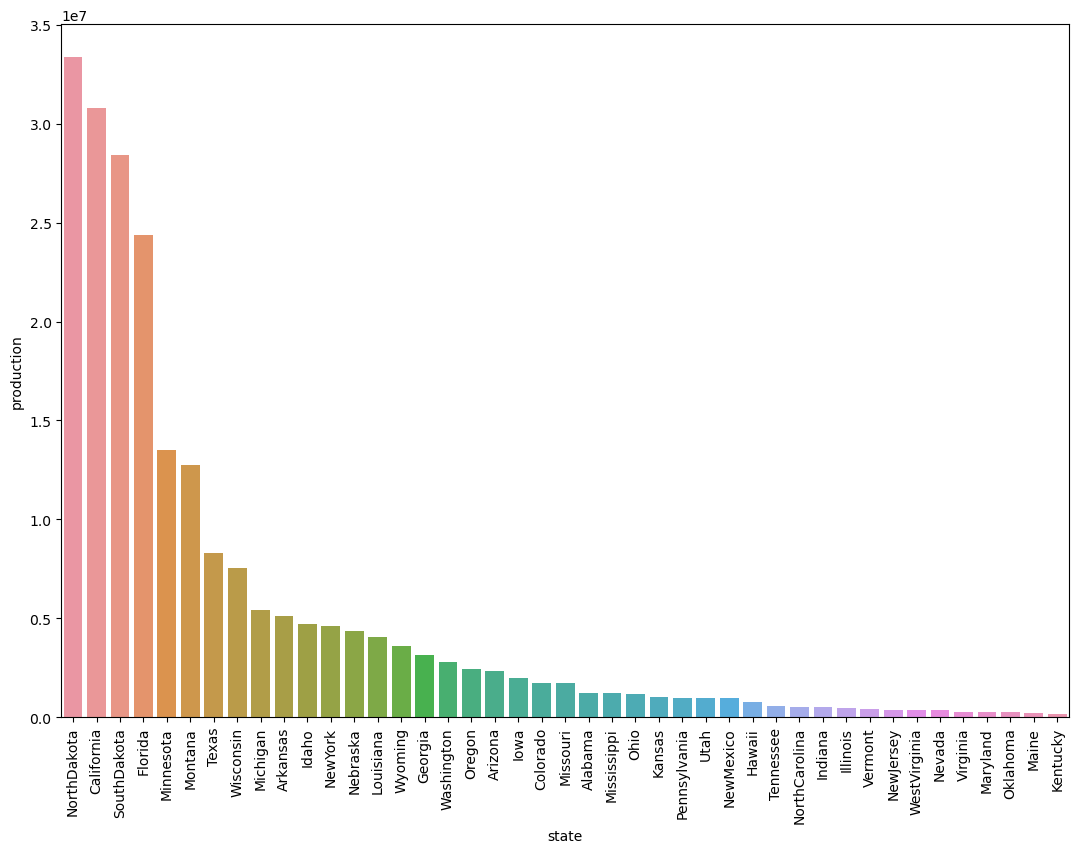

In [37]:
plt.figure(figsize=(13,9))
sns.barplot(x=data4['state'],y=data4['production'])
plt.xticks(rotation=90)
plt.show()

#### Inference

- In the year 2000, the state with the highest contribution to honey production in the United States was North Dakota, with a production volume of 33,350,000 pounds.